## The Project (Birds eye view)

### 1) Prepare the data

In [1]:
import torch
import torchvision
import torchvision.transforms as transforms

In [2]:
train_set = torchvision.datasets.FashionMNIST(
    root="./data/FashionMNIST",
    train=True,
    download=True,
    transform=transforms.Compose([
        transforms.ToTensor()
    ]))
train_loader = torch.utils.data.DataLoader(train_set, batch_size=10)

0it [00:00, ?it/s]Downloading http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/train-images-idx3-ubyte.gz to ./data/FashionMNIST/FashionMNIST/raw/train-images-idx3-ubyte.gz
100%|█████████▉| 26411008/26421880 [02:51<00:00, 200768.13it/s]Extracting ./data/FashionMNIST/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./data/FashionMNIST/FashionMNIST/raw

0it [00:00, ?it/s]Downloading http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/train-labels-idx1-ubyte.gz to ./data/FashionMNIST/FashionMNIST/raw/train-labels-idx1-ubyte.gz

  0%|          | 0/29515 [00:00<?, ?it/s]
32768it [00:01, 27425.97it/s]

0it [00:00, ?it/s]Extracting ./data/FashionMNIST/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./data/FashionMNIST/FashionMNIST/raw

 95%|█████████▌| 4210688/4422102 [00:16<00:00, 326790.01it/s]
26427392it [03:10, 200768.13it/s]
100%|█████████▉| 4407296/4422102 [00:16<00:00, 435541.22it/s]

0it [00:00, ?it/s]Extracting ./data/FashionMNIST/FashionMNIST/raw/t10k-images-idx3-ubyte

In [6]:
test_set = torchvision.datasets.FashionMNIST(
    root="./data/FashionMNIST",
    train=False,
    download=True,
    transform=transforms.Compose([
        transforms.ToTensor()
    ]))
test_loader = torch.utils.data.DataLoader(test_set, batch_size=10)

In [8]:
import numpy as np
import matplotlib.pyplot as plt

torch.set_printoptions(linewidth=120)

In [9]:
len(train_set)

60000

In [10]:
len(test_set)

10000

In [11]:
train_set.train_labels

tensor([9, 0, 0,  ..., 3, 0, 5])

In [13]:
test_set.test_labels

tensor([9, 2, 1,  ..., 8, 1, 5])

In [15]:
train_set.train_labels.bincount()  # every class has 6000 image in training set

tensor([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000])

In [16]:
test_set.test_labels.bincount()

tensor([1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000])

`Class imbalance is a common problem, but in our case , we just seen that the fashion mnist dataset is indeed balanced.`

In [17]:
sample = next(iter(train_set))

In [18]:
len(sample)

2

In [19]:
type(sample)

tuple

In [20]:
image, label = sample

In [21]:
image.shape

torch.Size([1, 28, 28])

Label: 9


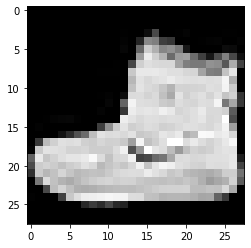

In [24]:
plt.imshow(image.squeeze(), cmap='gray')
print('Label:', label)

torch.Size([28, 28])

In [26]:
batch = next(iter(train_loader))

In [27]:
len(batch)

2

In [28]:
type(batch)

list

In [29]:
images, labels = batch

In [30]:
images.shape

torch.Size([10, 1, 28, 28])

In [31]:
labels.shape

torch.Size([10])

In [36]:
l = [1, 2, 3, 4]
it = iter(l)
print(it)
next(it)
next(it)

2

Labels:  tensor([9, 0, 0, 3, 0, 2, 7, 2, 5, 5])


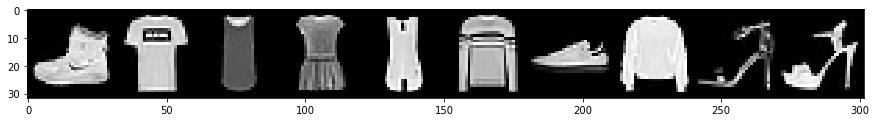

In [37]:
grid = torchvision.utils.make_grid(images, nrow=10)
plt.figure(figsize=(15, 15))
plt.imshow(np.transpose(grid, (1, 2, 0)))
print("Labels: ", labels)